# Project

## Imports

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import pandas as pd
import plotly.io as pio
import seaborn as sns
%matplotlib inline

In [19]:
from utils import *
from handle_dataset import *
from density import * 
from zscore import *
from plots import * 
from kmeans import *

In [14]:
DATA_PATH = 'data'

In [15]:
RESULTS_PATH = 'results'

In [16]:
activities_labels = {
    1 : 'STAND',
    2 : 'SIT',
    3 : 'SIT&TALK',
    4 : 'WALK',
    5 : 'WALK&TALK',
    6 : 'CLIMB_STAIRS',
    7 : 'CLIMB_STAIRS&TALK',
    8 : 'STAND_TO_SIT',
    9 : 'SIT_TO_STAND',
    10: 'STAND_TO_SIT&TALK',
    11: 'SIT&TALK_TO_STAND',
    12: 'STAND_TO_WALK', 
    13: 'WALK_TO_STAND', 
    14: 'STAND_TO_CLIMB_STAIRS',
    15: 'CLIMB_STAIRS_TO_WALK',
    16: 'CLIMB_STAIRS&TALK_TO_WALK&TALK', 

}

In [17]:
labels = [
    'STAND',
    'SIT',
    'SIT&TALK',
    'WALK',
    'WALK&TALK',
    'CLIMB_STAIRS',
    'CLIMB_STAIRS&TALK',
    'STAND_TO_SIT',
    'SIT_TO_STAND',
    'STAND_TO_SIT&TALK',
    'SIT&TALK_TO_STAND',
    'STAND_TO_WALK', 
    'WALK_TO_STAND', 
    'STAND_TO_CLIMB_STAIRS',
    'CLIMB_STAIRS_TO_WALK',
    'CLIMB_STAIRS&TALK_TO_WALK&TALK', 

]

## Exercise 2 - Import dataset

In [22]:
# data_user_0 = get_user_data(path=DATA_PATH, user_id=0)

In [23]:
# data_user_0.shape

In [24]:
dataset = get_all_data(DATA_PATH)

In [25]:
# dataset.shape

In [26]:
# type(dataset)

## Explore data

In [27]:
dataset.describe()

,device_id,accelerometer_x,accelerometer_y,accelerometer_z,gyroscope_x,gyroscope_y,gyroscope_z,magnetometer_x,magnetometer_y,magnetometer_z,timestamp,activity
count,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06
mean,3.429246e+00,7.717793e-01,8.451621e+00,1.520613e+00,-1.691060e-01,1.890623e+00,3.556803e-01,-1.450031e-02,6.034252e-01,4.014632e-01,5.555476e+05,4.032846e+00
std,1.188858e+00,2.494840e+00,3.743438e+00,3.747458e+00,3.592437e+01,5.289265e+01,4.621969e+01,4.767157e-01,4.752627e-01,6.953205e-01,3.720966e+05,2.582780e+00
min,1.000000e+00,-2.489000e+01,-2.324600e+01,-2.502500e+01,-5.088600e+02,-5.071500e+02,-4.077900e+02,-2.002100e+00,-1.438800e+00,-1.658700e+00,2.612300e+01,1.000000e+00
25%,2.000000e+00,-5.244600e-01,8.352300e+00,-1.328500e+00,-2.967200e+00,-2.829200e+00,-1.415125e+00,-4.087100e-01,5.211000e-01,-1.977500e-01,2.720200e+05,2.000000e+00
50%,3.000000e+00,3.722300e-01,9.388200e+00,1.323900e+00,1.709100e-01,-1.321600e-01,-1.696150e-02,3.941900e-02,7.182500e-01,4.391300e-01,5.370900e+05,4.000000e+00
75%,4.000000e+00,2.006400e+00,9.801800e+00,3.299600e+00,5.930100e+00,8.948325e+00,5.541700e+00,3.250500e-01,8.825900e-01,9.627200e-01,8.008600e+05,5.000000e+00
max,5.000000e+00,2.538100e+01,2.598500e+01,2.529000e+01,5.061000e+02,5.035700e+02,4.741600e+02,1.606100e+00,2.988100e+00,3.085500e+00,2.825500e+06,1.600000e+01


In [28]:
# dataset.info()

In [29]:
# dataset.columns

## Append metrics

In [30]:
data_with_features = append_metrics(dataset)

In [31]:
data_with_features

,device_id,accelerometer_x,accelerometer_y,accelerometer_z,gyroscope_x,gyroscope_y,gyroscope_z,magnetometer_x,magnetometer_y,magnetometer_z,timestamp,activity,accelerometer_module,gyroscope_module,magnetometer_module
0,1,-1.8650,9.3890,2.58120,-1.141800,-1.18560,0.84998,-0.34476,0.59839,1.01340,505.89,1,9.914340,1.852517,1.226340
1,1,-1.7963,9.3742,2.44600,-1.561800,-0.66165,0.59730,-0.34274,0.57631,1.00000,525.42,1,9.853184,1.798268,1.203995
2,1,-1.8696,9.3000,2.35140,-1.187700,-1.28410,0.14212,-0.34476,0.59639,1.01560,544.95,1,9.773151,1.754919,1.227185
3,1,-1.7961,9.3624,2.45840,-0.583990,-2.03340,0.42912,-0.32863,0.62249,1.01560,564.48,1,9.845011,2.158681,1.235692
4,1,-1.6768,9.3506,2.46850,-0.370500,-1.36470,0.37194,-0.33669,0.62048,1.02450,584.01,1,9.815237,1.462196,1.244169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3242723,5,-1.0568,9.7161,0.37560,-0.158430,-0.88740,0.44327,0.12121,0.62675,0.36739,1061000.00,1,9.780619,1.004523,0.736534
3242724,5,-1.0565,9.6921,0.38826,0.112400,-0.59353,0.39687,0.11111,0.59880,0.36304,1061000.00,1,9.757240,0.722784,0.709017
3242725,5,-1.0566,9.6920,0.37607,-0.054114,-0.67227,0.36407,0.11717,0.58084,0.35217,1061100.00,1,9.756674,0.766435,0.689295
3242726,5,-1.0563,9.6801,0.38850,0.096447,-0.51923,0.16742,0.11717,0.61677,0.36304,1061100.00,1,9.745309,0.554014,0.725212


## Select only right wrist data

Nos seguintes exercícios, apenas serão usados os dados do pulso direito.

In [32]:
def get_device_data(data, device_id):
    return data[data['device_id'] == device_id]

In [33]:
right_wrist_id = 2
data = get_device_data(data_with_features, right_wrist_id)
right_wrist_data = data[['accelerometer_module', 'gyroscope_module', 'magnetometer_module', 'activity']]
right_features = right_wrist_data[['accelerometer_module','gyroscope_module', 'magnetometer_module']]

## Exercise 3.1 - Boxplot of the vector modules grouped by activity

In [34]:
# boxplot_features(data_with_features, 0)
# boxplot_features(data_with_features, 1)
# boxplot_features(data_with_features, 2)

Pelos boxplot dos módulos dos diferentes vetores podemos concluir que:
    - as variáveis estão em ordens de grandeza muito diferentes
    - existe uma grande densidade de outliers. Isto pode dever-se a estarem a ser utilizados neste gráfico todos os dispositivos de sensores, o que poderá afetar os resultados.


### Plotting boxplot of the modules by activity separated by devices

![Boxplot core](./data/images/boxplot.png "Boxplot - detect outliers")

### Plot of the right wrist (id = 2)

In [35]:
# boxplot_features(right_wrist_data, 0, title='Right wrist')
# boxplot_features(right_wrist_data, 1, title='Right wrist')
# boxplot_features(right_wrist_data, 2, title='Right wrist')

Ao utilizar os dados de apenas od dados de um dispositivo, é notório que a quantidade de outliers diminui consideravelmente. 

In [36]:
# right_wrist_data.describe()

## Exercise 3.2 - Outliers density

In [37]:
# densities = calculate_density_by_activity(data, labels)
# densities

In [38]:
# plot_densities(densities)

Como se pode observar pelas densidades de outliers obtidas, o vetor de aceleração é o que apresenta maior quantidade de outliers. Isto poderá dever-se ao facto de ser o mais sensível a movimentos da pessoa. Pelo contrário, o vetor de variação do campo magnético, em algumas situações nem apresenta outliers. Outra conclusão que podemos retirar do gráfico, é que as atividades *Sit to stand* e *Sit and talk to stand* são as que apresentam maior quantidade de outliers nos três vetores, mostrando que o movimento de levantar gera muitas oscilações e perturbações nos sensores.

## Exercise 3.3 - Z-score test

In [39]:
# plot_zscore_outliers(data,'accelerometer_module')
# plot_zscore_outliers(data,'gyroscope_module')
# # plot_zscore_outliers(data,'magnetometer_module')

Pelos gráficos obtidos, podemos observar que à medida que o k aumenta, o número de pontos considerados outliers diminui. Mostra-se assim, que ao aumentar k, aumentamos a gama de valor válidos, sendo menos sensível a outliers

## Exercise 3.6 - K-means

### Try to divide by activities

Foi utilizado o KMeans com k igual ao número de atividades para tentar perceber se as atividades teriam valores distitos dos módulos dos vetores para as diferentes atividades 

In [40]:
# kmeans = KMeans(optimal_k)

In [41]:
# labels = kmeans.predict(right_features)

In [42]:
# plot_kmeans_clusters(kmeans.data, labels)

In [43]:
# labels.to_csv('labels.csv', index=False)

In [44]:
# plot_kmeans_clusters(kmeans.data, right_wrist_data['activity'] )

### Try to divide by devices

À semelhança do teste anterior, foi realizado um teste a todo o dataset para tentar perceber se os módulos dos três vetores para os diferentes dispositivos têm valores diferentes.

### Select data

In [45]:
accelerometer_data = data[['accelerometer_x', 'accelerometer_y', 'accelerometer_z']]
gyroscope_data = data[['gyroscope_x', 'gyroscope_y', 'gyroscope_z']]
magnetometer_data = data[['magnetometer_x', 'magnetometer_y', 'magnetometer_z']]

### Accelerometer

In [46]:
# optimal_k_acc = best_number_clusters(normalize_data(accelerometer_data), threshold=0.90)
# print('optimal k:', optimal_k_acc)

In [47]:
# print('optimal k:', optimal_k_acc)

Como se pode observar, segundo o método Elbow, k=9 parece ser o número de clusters ideal

In [48]:
# %%time
# kmeans_acc = KMeans(optimal_k_acc, max_iterations=150)
# labels_acc = kmeans_acc.predict(accelerometer_data)

In [49]:
# labels_acc.to_csv('labels_acc.csv', index=False)

In [50]:
# kmeans_acc.get_distances().max()

In [51]:
# labels_acc = kmeans_acc.get_labels_with_outliers(2.5)

In [52]:
# plot_kmeans_clusters(kmeans_acc.data, labels_acc, optimal_k_acc, 'accelerometer')

### Gyroscope

In [53]:
# optimal_k_gyro = best_number_clusters(gyroscope_data, threshold=0.90)
# print('optimal k:', optimal_k_gyro)


In [54]:
# %%time
# kmeans_gyro = KMeans(2)
# labels_gyro = kmeans_gyro.predict(gyroscope_data)

In [55]:
# labels_gyro = kmeans_gyro.get_labels_with_outliers(2.5)

In [56]:
# labels_gyro.to_csv('labels_gyro.csv', index=False)

In [57]:
# plot_kmeans_clusters(kmeans_gyro.data, labels_gyro, optimal_k_gyro, 'gyroscope')

### Magnetometer

In [58]:
# optimal_k_mag = best_number_clusters(normalize_data(magnetometer_data), threshold=0.85)
# print('optimal k:', optimal_k_mag)

In [59]:
# %%time
# kmeans_mag = KMeans(2)
# labels_mag = kmeans_mag.predict(magnetometer_data)

In [60]:
# labels_mag = kmeans_mag.get_labels_with_outliers(2.5)

In [61]:
# labels_mag.to_csv('labels_mag.csv', index=False)

In [62]:
# %%time
# plot_kmeans_clusters(kmeans_mag.data, labels_mag, optimal_k_mag, 'magnetometer')

### DBSCAN

Foi elaborado um estudo semelhante ao anterior, mas agora utilizando o DBSCAN como algoritmo de *unsupervised learning*

In [63]:
# from sklearn.cluster import DBSCAN

In [64]:
# acc_scan = DBSCAN(eps=1).fit(accelerometer_data)

In [65]:
# acc_labels = acc_scan.labels_

## Exercise 3.8 - Add outliers

In [67]:
k = 3
percentage = 0.1

In [68]:
# def calculate_density(outliers):
#     return outliers.sum() / len(outliers)

In [69]:
# def inject_outliers(quantity, data, outliers_indexes, k, mean, std, z=1):
#     data = data.copy()
#     non_outliers = data[outliers_indexes == False]
#     indexes = non_outliers.sample(quantity, random_state=42).index
#     data[indexes] = data[indexes].apply(lambda x :  (mean + k * random.choice([1, -1]) * (std + np.random.uniform(0, z))))
#     return data

In [70]:
# def add_outliers(percentage, k, data):
#     indexes = calculate_outliers_indexes(data, k)
#     density = calculate_density(indexes)
#     print('Density of outliers:', density * 100)
#     mean = data.mean()
#     std = data.std()
#     if density < percentage:
#         quantity = int((percentage - density) * len(data))
#         data_with_outliers = inject_outliers(quantity, data, indexes, k, mean, std)
#         return data_with_outliers, density

In [71]:
# plot_zscore_outliers(data, 'accelerometer_module', k_value=k )

In [72]:
# series_with_outliers, original_density = add_outliers(percentage, k, data['accelerometer_module'])

In [73]:
# outliers_data = data.copy()
# outliers_data['accelerometer_data'] = series_with_outliers

In [74]:
# outliers_data.to_csv('data_with_outliers.csv', index=False)

In [75]:
# data['accelerometer_module'].equals(series_with_outliers)

In [76]:
# diff_indexes = data['accelerometer_module'] != series_with_outliers

In [77]:
# percentage_added_outliers = (diff_indexes.sum() / len(data)) * 100
# print('Percentage of added outliers:', percentage_added_outliers)

In [78]:
# round(original_density*100 + percentage_added_outliers)

In [79]:
# plot_zscore_outliers(outliers_data, 'accelerometer_module', k_value=k )

## Exercise 3.9 - Linear regression

Para calcular o melhor número de valores anteriores (*p*) em que basear as estimativas do modelo de regressão linear, utilizado foram usados os k primeiros valores (não outliers) do dataset, onde k é o índice do primeiro outlier calculado. Estes valores foram usados na técnica do *leave-one-out* para testar o melhor número de p em que basear o modelo. Este teste foi 5 vezes para prever valores diferentes, usando o *RMSE* para calcular a accuracy. O valor de p foi calculado a partir da média dos melhores p obtidos nos testes. Este valor será depois utilizado pelo modelo para estimar todos os outliers

In [ ]:
# k = 3

In [86]:
# outliers_data = pd.read_csv('data_with_outliers.csv')

In [87]:
# regressed_acc = outliers_data['accelerometer_module'].copy()

In [88]:
# outliers_indexes = calculate_outliers_indexes(regressed_acc, k)

In [89]:
# indexes = pd.Series(outliers_data[outliers_indexes].index)
# len(indexes)

In [90]:
# first_outlier = indexes.min()
# first_outlier

In [80]:
def calculate_alphas(data, p):
    rows = len(data) - p
    cols = p + 1
    x = np.ones((rows, cols))
    for i in range(rows):
        x[i, 1:] = data[i:p+i][::-1]

    x_plus = np.linalg.pinv(x)
    a = x_plus.dot(data[p:])
    del x_plus
    del x
    return a

In [81]:
def predict(data, p, a=None):
    """ receives only the previous points and returns the predicted value based on the previous p points"""
    size = len(data)
    if a is None:
        print('calculate_betas')
        a = calculate_alphas(data, p)
    prev_values = np.ones(p+1)
    prev_values[1:] = data[:size-p-1:-1]
    y_pred = prev_values.dot(a)
    del prev_values
    return y_pred

In [82]:
def rmse (y_real, y_pred):
    """https://www.askpython.com/python/examples/rmse-root-mean-square-error"""
    mse = np.square(y_real - y_pred).mean()
    return np.sqrt(mse)

In [84]:
def define_best_p_value(data, index_first_outlier, min_p_value=10, max_step=100, step=100):
    """Leave one-out technique to determine the best number of previous values to predict a value"""
    p_possible_values = range(min_p_value, max_step, step)
    real_value = data[index_first_outlier]
    errors = []
    for p in p_possible_values:
        d = data[:index_first_outlier]
        y_pred = predict(d, p)
        print('P: ', p)
        print('Real: ', real_value)
        print('Pred: ', y_pred)
        errors.append(rmse(real_value, y_pred))

    
    plt.figure()
    plt.plot(p_possible_values, errors, '*')

    for i in range(len(errors)):
        plt.annotate(errors[i], (p_possible_values[i], errors[i] + 0.2))

    plt.xlabel('Previous p values')
    plt.ylabel('RMSE')
    plt.title('Errors obtained with RMSE using the Leave-one-out technique to determine the best p value')
    plt.show()
    
    return p_possible_values[np.array(errors).argmin()], errors
    

In [85]:
def plot_results(data, p):
    print('Real value:', data[-1])
    y_pred = predict(data[:-1], p)
    print('Predicted value:', y_pred)
    x_axis = np.arange(len(data))
    plt.scatter(x_axis, data, label='real values')
    x_axis_pred = len(data)
    plt.scatter(x_axis_pred, y_pred, color='r', label='predicted values')
    plt.legend()
    plt.show()

### Determine best number of previous value to use in the model

In [91]:
# %%time
# bests = []
# errors_values = []
# init=500
# final = 9000
# step= 500
# for i in range(5):
#     index = np.random.randint(final, first_outlier)
#     print(index)
#     best_p_value, rmses = define_best_p_value(outliers_data['accelerometer_module'], index, init, final, step)
#     print('Best:', best_p_value)
#     bests.append((index, best_p_value))
#     errors_values.append(rmses)

In [92]:
# bests

Verificou-se que os valores ideais rondavam o p=1000, pelo que decidiu-se utilizar um p de 1025.

In [93]:
# p_value = 1025

### Predict values based on p previous values

In [94]:
# a = calculate_alphas(regressed_acc.loc[:first_outlier-1], p_value)
# a

In [95]:
# regressed_acc[indexes] = indexes.apply(lambda x: predict(regressed_acc[:x], p_value, a))

In [96]:
# regressed_acc.equals(outliers_data['accelerometer_module'])

In [97]:
# outliers_data['accelerometer_data'] = regressed_acc

In [98]:
# outliers_data.to_csv('data_linear_regression.csv', index=False)

In [99]:
# plot_zscore_outliers(outliers_data, 'accelerometer_module', k_value=k )

### Predict values based on previous and por values

In [104]:
def predict_in_the_middle(data_all, p, split_index):
    if split_index == len(data_all)-1:
        # predict the last index of the data
        return predict(data_all[:-1], p)
    if split_index == 0:
        # predict the first index of the data
        return predict(data_all[1:][::-1], p)
    if len(data_all) - split_index - 1< p + 1 or split_index < p + 1:
        print('Invalid split index')
        return None

    prev_data = data_all[:split_index]
    post_data = data_all[split_index+1:]

    prev_pred = predict(prev_data, p)
    post_pred = predict(post_data[::-1], p)

    return (prev_pred + post_pred) / 2 # mean of the two predictions


In [105]:
def predict_data_middle(data, k, p):
    data = data.copy()
    outliers_indexes = calculate_outliers_indexes(data, k)
    indexes = pd.Series(data[outliers_indexes].index)
    data[indexes] = indexes.apply(lambda x: predict_in_the_middle(data, p, x))
    return data

In [125]:
outliers_data = pd.read_csv('data_with_outliers.csv')

In [130]:
outliers_indexes = calculate_outliers_indexes(outliers_data['accelerometer_data'], k)
indexes = pd.Series(outliers_data[outliers_indexes].index)

In [129]:
outliers_data.shape

(781822, 16)

In [118]:
a_prev = calculate_alphas(outliers_data['accelerometer_module'].loc[:first_outlier-1], p)
a_post = calculate_alphas(outliers_data['accelerometer_module'].loc[:first_outlier-1][::-1], p)

ValueError: negative dimensions are not allowed

In [ ]:
data[indexes] = indexes.apply(lambda x: predict_in_the_middle(data, p, x))


In [107]:
predicted_data = predict_data_middle(outliers_data['accelerometer_module'], k, 100)

calculate_betas
calculate_betas


C:\Users\joana\AppData\Local\Temp\ipykernel_17880\3473316484.py:6: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

C:\Users\joana\AppData\Local\Temp\ipykernel_17880\3473316484.py:9: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

C:\Users\joana\AppData\Local\Temp\ipykernel_17880\3283218449.py:8: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` 

calculate_betas
calculate_betas
calculate_betas
calculate_betas
calculate_betas
calculate_betas


KeyboardInterrupt: 

In [ ]:
predicted_data.equals(outliers_data['accelerometer_module'])

## Exercise 4.1 - Statistical significance - control the risk

In [ ]:
# from scipy.stats import kstest
# from scipy.stats import norm

Nos resultados apresentados a seguir, foi utilizado um *threshold* the 5% no teste de Kolgomorov-Smirov para que o p-value de forma a aceitar a distribuição das variáveis como normal.

In [ ]:
# def ks_test(data, variable, threshold=0.05):
#     # check if the activities have a normal (gaussian distribution)
#     # https://www.statology.org/plot-normal-distribution-python/
#     plt.figure()
#     plt.title(f'{variable} distribution')
#     for activity in data['activity'].unique():
#         #divide data by activitis to check the normallity
#         activity_data = data[data['activity'] == activity][variable]
#         statistics, p_value = kstest(activity_data, norm.cdf)
#         if p_value < threshold:
#             print(f'Variable {variable} - activitiy {activities_labels[activity]}: Reject normal distributions | p-value={p_value}')
#         else:
#             print(f'Variable {variable} - activitiy {activities_labels[activity]}: Normal distribution | p-value={p_value}')
#         activity_data.hist(alpha=0.4, label=activities_labels[activity])
        
#     plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
#     plt.show()
                             

In [ ]:
# accelerometer_mod_data = right_wrist_data[['accelerometer_module', 'activity']]
# gyroscope_mod_data = right_wrist_data[['gyroscope_module', 'activity']]
# magnetometer_mod_data = right_wrist_data[['magnetometer_module', 'activity']]

In [ ]:
# ks_test(accelerometer_mod_data, 'accelerometer_module')

Como se pode observar, apesar de histogramas do módulo do vetor de aceleração parecerem seguir uma distribuição normal, todos têm p-value inferior ao minimo necessário para aceitar a hipótese nula, logo não segue uma distribuição normal.

In [ ]:
# ks_test(gyroscope_mod_data, 'gyroscope_module')

Como se pode observar pela distribuição e pelo p-value, o módulo do vetor giroscópio não segue uma distribuição gaussiana.

In [ ]:
# ks_test(magnetometer_mod_data, 'magnetometer_module')

Pela observação so gráfico e pelo valor obtido no p-value concluí-mos que o módulo do vetor do magnómetro não segue uma distribuição normal.

Em todas as variáveis, notou-se o que valor resultante do p-value usando o teste de Kolmogorov-Smirnov é nulo, ou perto disso. Assim, conclí-mos que nenhum dos vetores segue uma distribuição normal.

Em suma:

- os módulos dos vetores não seguem uma distribuição normal/gaussiana pelo que temos de escolher um teste não-paramétrico (apesar de termos um dimensão bastante elevada de valores de input)
- temos 3 variáveis (x, y, e, z de cada vetor) numéricas como valor de input que estão emparelhadas entre si
 
Assim, segundo o *Choosing Statistical Tests* (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2881615/), escolhemos o teste de Friedman para calcular a significância estatística das variáveis.

In [ ]:
# from scipy.stats import friedmanchisquare

In [ ]:
# def friedman_test(data, variables, threshold=0.05):
#     # https://www.statology.org/friedman-test-python/
#     # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.friedmanchisquare.html

#     # null-hypothesis: all variables have the same probability (mean)
#     # at least one variable has a different probability

#     x = data[variables[0]]
#     y = data[variables[1]]
#     z = data[variables[2]]

#     for activity in data['activity'].unique():
#         act_x = x[data['activity'] == activity]
#         act_y = y[data['activity'] == activity]
#         act_z = z[data['activity'] == activity]

#         statistic, pvalue = friedmanchisquare(act_x, act_y, act_z)

#         if pvalue < threshold:
#             print(f"Activity {activities_labels[activity]} - Samples don't have the same distribution | p-value={pvalue}")
#         else:
#             print(f"Activity {activities_labels[activity]} - Samples have the same distribution | p-value={pvalue}")


In [ ]:
# var = 'accelerometer'
# friedman_test(data[[f'{var}_x', f'{var}_y', f'{var}_z', 'activity']], [f'{var}_x', f'{var}_y', f'{var}_z'])

In [ ]:
# var = 'gyroscope'
# friedman_test(data[[f'{var}_x', f'{var}_y', f'{var}_z', 'activity']], [f'{var}_x', f'{var}_y', f'{var}_z'])

In [ ]:
# var = 'magnetometer'
# friedman_test(data[[f'{var}_x', f'{var}_y', f'{var}_z', 'activity']], [f'{var}_x', f'{var}_y', f'{var}_z'])

Como se pode observar, o p-value resultante do teste de Friedman para todas os vetores e actividades, é sempre nulo, pelo que rejeitamos a hipótese de que os dados seguem a mesma distribuição.

## Exercise 4.2 - feature extraction

Após ler o artigo *A Feature Selection-Based Framework for Human Activity
Recognition Using Wearable Multimodal Sensors* (https://www.semanticscholar.org/paper/A-feature-selection-based-framework-for-human-using-Zhang-Sawchuk/d67fa24e9877b0773e76af259441278ee3cf8bc4?p2df), verificou-se que seria necessário recolher features estatísticas e físicas. Seguindo o que os autores fizeram, apenas serão utilizados do dados da perna direita (device_id_id = 4) na extração das features.

**Features Estatísticas**

As features calculadas serão: 
- média
- mediana
- desvio padrão
- variância
- RMS - root mean square
- média das derivadas
- intervalo inter-quartile
- zero crossing rate
- mean crossing rate
-  spectral entropy


**Features Físicas**

As features físicas utilizadas serão: 
- média da intensidade de movimento (AI) - apenas para o vetor de aceleração
- variância da intensidade do movimento (VI) - apenas para o vetor de aceleração
- área normalizada da magnitude do sinal (SMA) - apenas para o vetor de aceleração
- eigenvalues da direção dominante no vetor de aceleração (EVA)
- correlação entre direção da gravidade e as restantes direções no vetor de aceleração  (CAGH)
- média da velocidade ao longo do direção - (AVH)
- média da velocidade ao longo da direção da gravidade (AVG)
- média da rotação dos ângulos dada a direção da gravidade (ARATG)
- frêquencia dominante em cada vetor direção (DF)
- energia de cada vetor direção (Energy)
- média da energia da aceleração (AAE)
- média da energia da rotação (ARE)


In [ ]:
sensors_columns = [
    'accelerometer_x', 'accelerometer_y', 'accelerometer_z',
    'gyroscope_x', 'gyroscope_y', 'gyroscope_z',
    'magnetometer_x', 'magnetometer_y', 'magnetometer_z',
]


In [ ]:
# select rows
sensors_data = data[sensors_columns]

### Frequency
Segundo o README do dataset, as amostas foram recolhidas a uma frequencia de amostraggem de 51.2 Hz

In [ ]:
fs = 51.2
t = 1 / fs

### Window size and overlap

De forma a evitar o aliasing, iremos calcular as features por janela, sendo que iremos usar um tamanho de janela de 3 periodos e uma sobreposição de 60%

In [ ]:
window_periods = 3
window_size = int(window_periods / t)
overlap = 0.6
step = int(window_size * overlap)

In [ ]:
from scipy import stats

In [ ]:
from scipy.fft import fft

In [ ]:
def extract_statistical_features(data):
    """Receives a dataframe of a given window and returns the statistical features extracted"""
    df = pd.DataFrame()
    for column in data.columns:
        df[f'{column}_mean'] = [data[column].mean()]
        # mean
        # median
        df[f'{column}_median'] = [data[column].median()]
        # Std
        df[f'{column}_std'] = [data[column].std()]
        # variance
        df[f'{column}_variance'] = [data[column].var()]
        # Root mean square
        df[f'{column}_rms'] = [np.sqrt((data[column] ** 2).mean())]
        # average derivatives
        # Skewness
        df[f'{column}_skewness'] = [data[column].skew()]
        # kurtosis
        df[f'{column}_kurtosis'] = [data[column].kurtosis()]
        # Interquartile range
        df[f'{column}_interquantile'] = [stats.iqr(data[column])]
        # zero crossing rate
        df[f'{column}_non_crossing_rate'] = [len(np.nonzero(np.diff(data[column] > 0))[0])] # https://www.folkstalk.com/tech/zero-crossing-rate-python-with-code-examples/
        # mean crossing rate
        aux = data[column] - data[column].mean() # to centre in zero
        df[f'{column}_mean_crossing_rate'] = [len(np.nonzero(np.diff(aux > 0))[0])]
        # TODO: pairwise correlation
        # TODO: spectral entropy
    return df

In [11]:
# Physical features
def mi(data):
    return np.sqrt((data**2).sum(axis=1))

def ai(mi_data):
    return mi_data.mean()

def vi(mi_data):
    return mi_data.var()

def sma(data):
    return np.sum(data.abs().sum()) / len(data)

def eva(data):
    cov_data = data.cov()
    eigenvalues, _ = np.linalg.eig(cov_data)
    return eigenvalues[0], eigenvalues[1]

def cagh(data):
    """Accelemeter data"""
    norm = np.sqrt((data ** 2).sum(axis=1))
    coef = np.corrcoef(data['accelerometer_x'], norm)
    #print(coef)
    # print(coef[0,1])
    return coef[0, 1]

def avh(data, time):
    """Accelemeter data"""
    velo_y = data['accelerometer_y'].mean() * time
    velo_z = data['accelerometer_z'].mean() * time
    return np.sqrt(velo_y **2 + velo_z**2)

def avg(data):
    """Accelemeter data"""
    return np.trapz(data['accelerometer_x'])

def aratg(data):
    """Gyroscope data """
    aux = data['gyroscope_x'].sum() / len(data)
    # print('aratg')
    # print(aux)
    # print(type(aux))
    return aux

def dominant_frequency(data):
    return np.argmax(fft(data.to_numpy())**2)

def energy(data):
    return np.sum(np.abs(fft(data.to_numpy()))**2) / len(data)

In [ ]:
def extract_physical_all(data):
    """ Extracts the features das include the 3 vector, receive a dataframe in a given window that has acc, gyro, mag, xyz values """
    df = pd.DataFrame()
    for column in data.columns:
        # dominant frequency
        df[f'{column}_df'] = [dominant_frequency(data[column])]
        df[f'{column}_energy'] = [energy(data)]
        
    return df

In [ ]:
accelerometer_columns = ['accelerometer_x', 'accelerometer_y', 'accelerometer_z']
gyroscope_columns = ['gyroscope_x', 'gyroscope_y', 'gyroscope_z']

In [ ]:
def extract_phisical_features(data):
    """Receives the data containing the sensors accelerometer, gyroscope, magnetometer"""
    df = extract_physical_all(data)
    # MI - movement intensity - independent od the orientation not used
    mi_values = mi(data[accelerometer_columns])
    # eigenvalues of dominant directions
    eva_values = eva(data[accelerometer_columns])
    # AI - MI mean
    df['ai'] = [ai(mi_values)]
    # VI - MI variance
    df['vi'] = [vi(mi_values)]
    # SMA - normalized signal magnitude area
    df['sma'] = [sma(data)]
    # EVA - eigenvalues of dominant directions
    df['eva_1'] = [eva_values[0]]
    df['eva_2'] = [eva_values[1]]
    # CAGH - correlation between acceleration along gravity and heading directions
    df['cagh'] = [cagh(data[accelerometer_columns])]
    # AVH - averaged velocity along heading direction
    df['avh'] = [avh(data[accelerometer_columns], window_periods)]
    # AVG - averaged velocity along gravity direction
    df['avg'] = [avg(data[accelerometer_columns])]
    # ARATG - average rotation angles related to gravity direction
    df['aratg'] = [aratg(data[gyroscope_columns])]
    # AAE averaged acceleration energy
    df['aae'] = np.mean([df['accelerometer_x_energy'], df['accelerometer_y_energy'], df['accelerometer_z_energy']])
    # ARE - averaged rotation energy
    df['are'] = np.mean([df['gyroscope_x_energy'], df['gyroscope_y_energy'], df['gyroscope_z_energy']])
    
    return df
    

In [10]:
def extract_features(data):
    """ Receives the original data and returns the extracted physical and statistical features"""
    physical_dataframes = []
    statistical_dataframes = []
    count = 0
    for i in range(window_size, len(data), step):
        physical_dataframes.append(extract_phisical_features(data.iloc[i-window_size:i, :]))
        statistical_dataframes.append(extract_statistical_features(data.iloc[i-window_size:i, :]))
        count += 1
    print(count)
    physical = pd.concat(physical_dataframes)
    statistical = pd.concat(statistical_dataframes)
    
    return pd.concat([statistical, physical], axis=1)

In [ ]:
# len(range(window_size, len(data), step))

8590

In [ ]:
# %%time
# extracted_data = extract_features(sensors_data)

8590
CPU times: total: 5min 55s
Wall time: 6min 21s


In [20]:
features_path = 'extracted_features.csv'

In [ ]:
# extracted_data.columns[extracted_data.dtypes == 'object']

In [ ]:
# extracted_data.to_csv(features_path, index=False)

## Exercise 4.3 - PCA

Para saber como utilizar o PCA do sklearn, foi utilizado https://www.youtube.com/watch?v=Lsue2gEM9D0&t=7s e https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

Após verificar que se gerariam muitos principal components (PC), foi limitado este número para apenas 10, uma vez notou em testes anteriores que o PC1 e PC2 é que seriam mais significativos, sendo os restantes muito perto de zero.

In [21]:
features_data = pd.read_csv(features_path)

In [28]:
features_data

,accelerometer_x_mean,accelerometer_x_median,accelerometer_x_std,accelerometer_x_variance,accelerometer_x_rms,accelerometer_x_skewness,accelerometer_x_kurtosis,accelerometer_x_interquantile,accelerometer_x_non_crossing_rate,accelerometer_x_mean_crossing_rate,...,vi,sma,eva_1,eva_2,cagh,avh,avg,aratg,aae,are
0,2.847627,2.8371,0.088793,0.007884,2.849002,-0.053388,-0.153376,0.1359,0,28,...,0.003099,21.423019,0.032103,0.003754,0.362241,28.732732,432.67870,-0.102949,1023.276156,1023.276156
1,2.509431,2.6223,0.403219,0.162585,2.541411,-0.243542,-1.616403,0.8190,0,5,...,0.009878,23.791640,0.192054,0.009865,0.038612,28.985034,381.44160,0.853506,1224.901292,1224.901292
2,2.066113,2.0559,0.110735,0.012262,2.069059,0.713484,2.077171,0.1332,0,40,...,0.007225,21.511740,0.013264,0.003128,0.326979,29.344474,313.83645,0.584676,1115.674725,1115.674725
3,2.102871,2.1032,0.093907,0.008818,2.104953,0.121153,1.417577,0.1201,0,48,...,0.003415,19.772184,0.009480,0.004758,0.398556,29.309836,319.72040,0.127119,978.956772,978.956772
4,2.130076,2.1390,0.083996,0.007055,2.131721,-0.214175,2.077270,0.0967,0,77,...,0.002824,18.900349,0.007410,0.003813,0.451266,29.295215,323.80505,-0.295426,946.851864,946.851864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8585,2.746267,2.7252,0.118915,0.014141,2.748824,-0.174503,-0.029698,0.1573,0,13,...,0.002828,18.775523,0.014777,0.002742,0.369861,28.742194,417.42405,-0.277409,1015.214078,1015.214078
8586,2.820486,2.8221,0.097108,0.009430,2.822146,-1.811966,5.394350,0.0852,0,18,...,0.001696,18.092148,0.009655,0.001564,0.494576,28.672289,428.77925,-0.266622,985.968711,985.968711
8587,2.817767,2.8212,0.037686,0.001420,2.818018,0.284343,0.344900,0.0594,0,30,...,0.001057,16.822684,0.001438,0.001319,0.316572,28.676218,428.32060,-0.015982,919.817513,919.817513
8588,2.818600,2.8335,0.047380,0.002245,2.818996,-0.472785,-0.165521,0.0599,0,18,...,0.001002,17.023203,0.002317,0.001205,0.235458,28.685090,428.48420,0.081648,925.502777,925.502777


In [22]:
features_data.shape

(8590, 119)

O dataset de features extraidas contém 119 features diferentes que representam o dataset original.

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [74]:
scaled_data = StandardScaler().fit_transform(features_data)

In [79]:
pca = PCA(n_components=80)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

In [80]:
# calculate percentage variation of each principal component 
percentage_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

In [81]:
# labels of each principal component
labels_pca = [f'PC{x}' for x in range(1, len(percentage_var) + 1)]

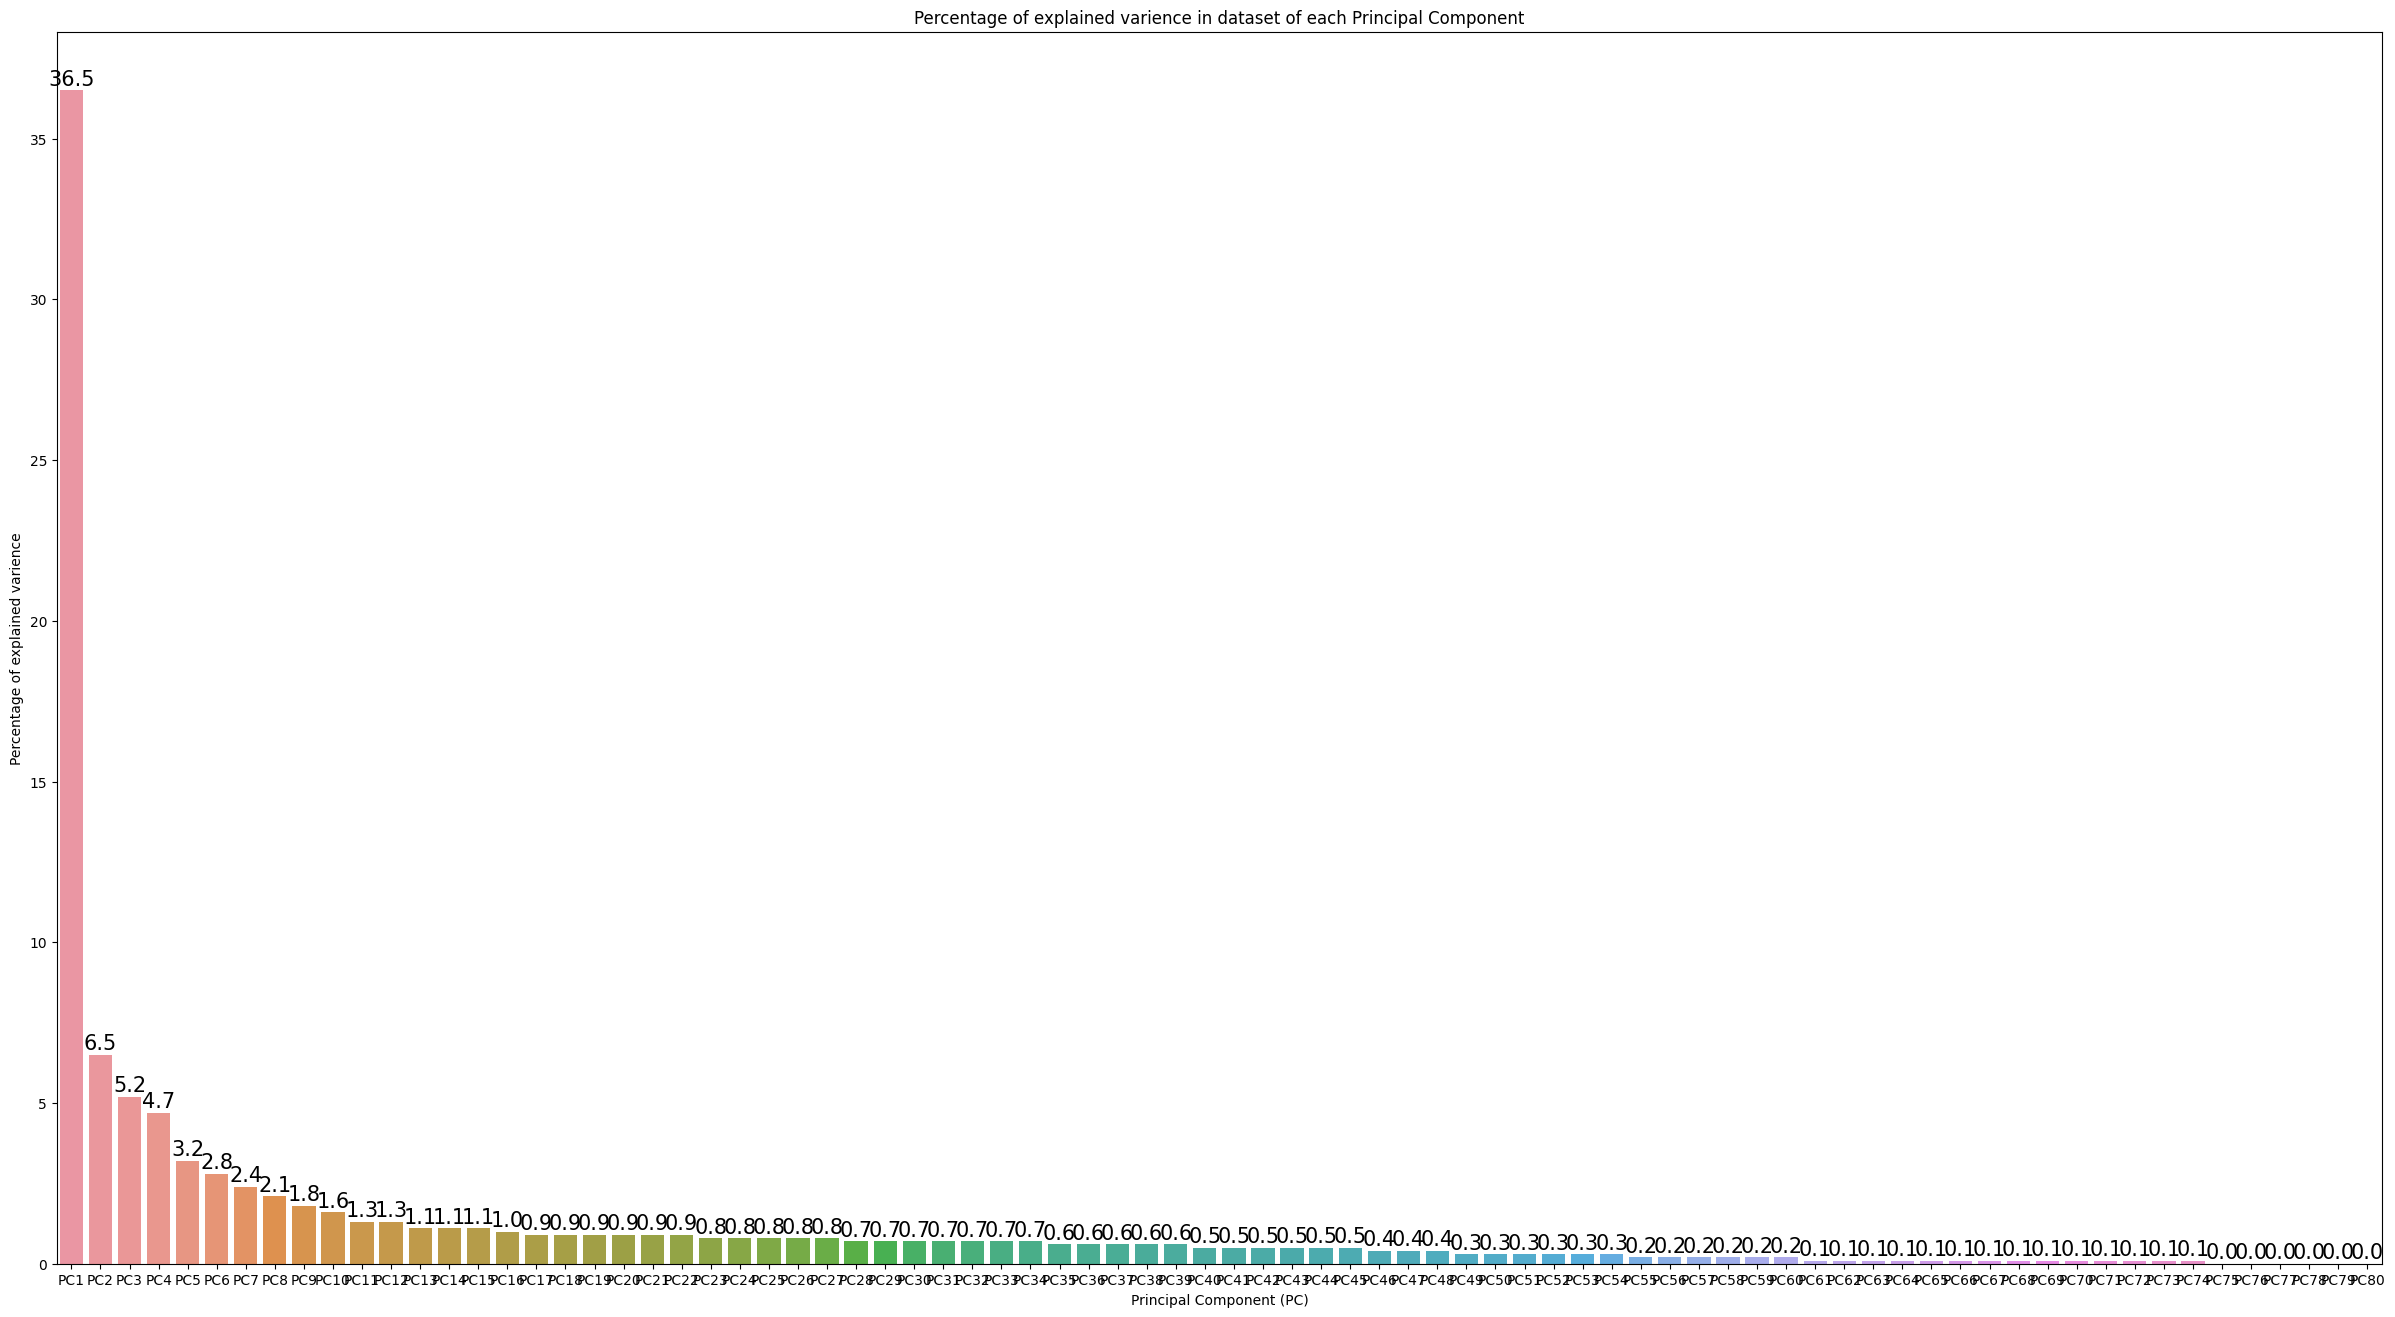

In [83]:
plt.figure(figsize=(30, 16))
plots = sns.barplot(x='Principal Component', y='Percentage of explained varience',  
                    data={'Principal Component' : labels_pca, 
                         'Percentage of explained varience': percentage_var})
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('Principal Component (PC)')
plt.ylabel('Percentage of explained varience')
plt.title('Percentage of explained varience in dataset of each Principal Component')
plt.show()

In [98]:
cumulative_sum = np.cumsum(percentage_var)
cumulative_sum

array([36.5, 43. , 48.2, 52.9, 56.1, 58.9, 61.3, 63.4, 65.2, 66.8, 68.1,
       69.4, 70.5, 71.6, 72.7, 73.7, 74.6, 75.5, 76.4, 77.3, 78.2, 79.1,
       79.9, 80.7, 81.5, 82.3, 83.1, 83.8, 84.5, 85.2, 85.9, 86.6, 87.3,
       88. , 88.6, 89.2, 89.8, 90.4, 91. , 91.5, 92. , 92.5, 93. , 93.5,
       94. , 94.4, 94.8, 95.2, 95.5, 95.8, 96.1, 96.4, 96.7, 97. , 97.2,
       97.4, 97.6, 97.8, 98. , 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8,
       98.9, 99. , 99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6])

In [102]:
print('Principal components to achieve at least 75% of explained variance:')
cumulative_sum = np.cumsum(percentage_var)
labels_pca[:np.argmax(cumulative_sum >= 75)]

Principal components to achieve at least 75% of explained variance:


['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17']

Como de pode observar, a componente que melhor descreve o dataset é a componente PC1, descrevendo 36.5% dos dados. Para conseguir descrever pelo menos 75% dos dados são necessários os primeiros 17 principal components

In [103]:
pca_dataframe = pd.DataFrame(pca.components_.T, index=features_data.columns, columns=labels_pca)
pca_dataframe

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80
accelerometer_x_mean,-0.025700,0.196943,-0.251519,-0.119106,0.040322,-0.136613,-0.126894,0.013287,0.026716,0.106356,...,-0.007726,0.050507,-0.022118,0.001574,0.011220,-0.064316,-0.012398,-0.062114,-0.025814,-0.006105
accelerometer_x_median,-0.026989,0.195959,-0.250650,-0.117612,0.044251,-0.135079,-0.125130,0.016994,0.023959,0.106412,...,-0.006850,0.057198,-0.024616,0.012918,0.011762,-0.065215,-0.017784,-0.057276,-0.021733,0.002370
accelerometer_x_std,0.130024,0.060010,0.003074,0.048273,0.128703,0.032128,0.042848,-0.001993,0.016825,0.016907,...,-0.046755,-0.023005,0.003523,-0.086396,-0.027960,-0.010717,-0.013387,0.045786,0.005930,-0.031847
accelerometer_x_variance,0.088889,0.104568,0.012667,0.064355,0.197246,0.034808,0.092900,0.009100,0.077999,-0.039129,...,0.082840,0.079180,0.415956,-0.092922,-0.002279,0.025124,-0.034015,0.039968,0.106573,-0.031382
accelerometer_x_rms,-0.037026,0.200719,-0.092370,0.021994,0.108889,-0.234453,-0.168718,-0.038873,0.056994,0.215691,...,-0.094030,-0.171527,0.031119,0.071648,0.063049,-0.195491,-0.085502,-0.194017,-0.082843,-0.070483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
avh,0.060813,-0.167616,0.063265,-0.052020,-0.205219,0.211159,0.091626,0.010760,-0.057685,-0.189733,...,-0.115529,-0.015056,-0.028606,0.081362,0.105283,-0.321678,-0.137991,-0.339449,-0.149540,-0.082956
avg,-0.025686,0.196962,-0.251517,-0.119073,0.040332,-0.136644,-0.126890,0.013371,0.026658,0.106341,...,-0.007882,0.050508,-0.022249,0.001473,0.011316,-0.064572,-0.012221,-0.062061,-0.025811,-0.006205
aratg,-0.008572,-0.063670,-0.240812,0.271185,-0.074442,0.037927,0.002135,-0.063217,0.061129,-0.012684,...,-0.022192,0.042539,0.008828,0.021387,0.034356,-0.024924,0.013894,0.035256,-0.001637,-0.013339
aae,0.142094,0.074915,0.026232,0.007244,-0.091111,-0.007393,-0.076015,-0.028613,0.030092,-0.052276,...,-0.030361,-0.006170,-0.020802,-0.029869,-0.033742,0.015297,0.000949,-0.034722,-0.025122,0.007346


In [105]:
pca_dataframe_relevant = pca_dataframe.loc[:, 'PC1':'PC17']
pca_dataframe_relevant

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
accelerometer_x_mean,-0.025700,0.196943,-0.251519,-0.119106,0.040322,-0.136613,-0.126894,0.013287,0.026716,0.106356,-0.027912,-0.030272,-0.028562,-0.073752,0.027505,-0.028998,-0.011034
accelerometer_x_median,-0.026989,0.195959,-0.250650,-0.117612,0.044251,-0.135079,-0.125130,0.016994,0.023959,0.106412,-0.022131,-0.028037,-0.021078,-0.081581,0.027850,-0.035955,-0.020152
accelerometer_x_std,0.130024,0.060010,0.003074,0.048273,0.128703,0.032128,0.042848,-0.001993,0.016825,0.016907,-0.018676,-0.000124,-0.070130,-0.083500,-0.010199,-0.054473,0.040714
accelerometer_x_variance,0.088889,0.104568,0.012667,0.064355,0.197246,0.034808,0.092900,0.009100,0.077999,-0.039129,-0.161648,0.073239,-0.140066,-0.102480,-0.037796,-0.054388,0.040551
accelerometer_x_rms,-0.037026,0.200719,-0.092370,0.021994,0.108889,-0.234453,-0.168718,-0.038873,0.056994,0.215691,-0.086867,-0.042649,-0.027673,-0.007187,0.010618,-0.077022,-0.083801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
avh,0.060813,-0.167616,0.063265,-0.052020,-0.205219,0.211159,0.091626,0.010760,-0.057685,-0.189733,0.097797,0.042183,-0.000539,0.015927,-0.000819,0.075409,0.101613
avg,-0.025686,0.196962,-0.251517,-0.119073,0.040332,-0.136644,-0.126890,0.013371,0.026658,0.106341,-0.027925,-0.030253,-0.028489,-0.073704,0.027517,-0.029047,-0.011121
aratg,-0.008572,-0.063670,-0.240812,0.271185,-0.074442,0.037927,0.002135,-0.063217,0.061129,-0.012684,0.008378,-0.011017,0.086738,0.029003,0.002829,-0.028608,0.057524
aae,0.142094,0.074915,0.026232,0.007244,-0.091111,-0.007393,-0.076015,-0.028613,0.030092,-0.052276,-0.057291,0.046633,0.004007,0.013696,-0.020628,0.018969,-0.009680


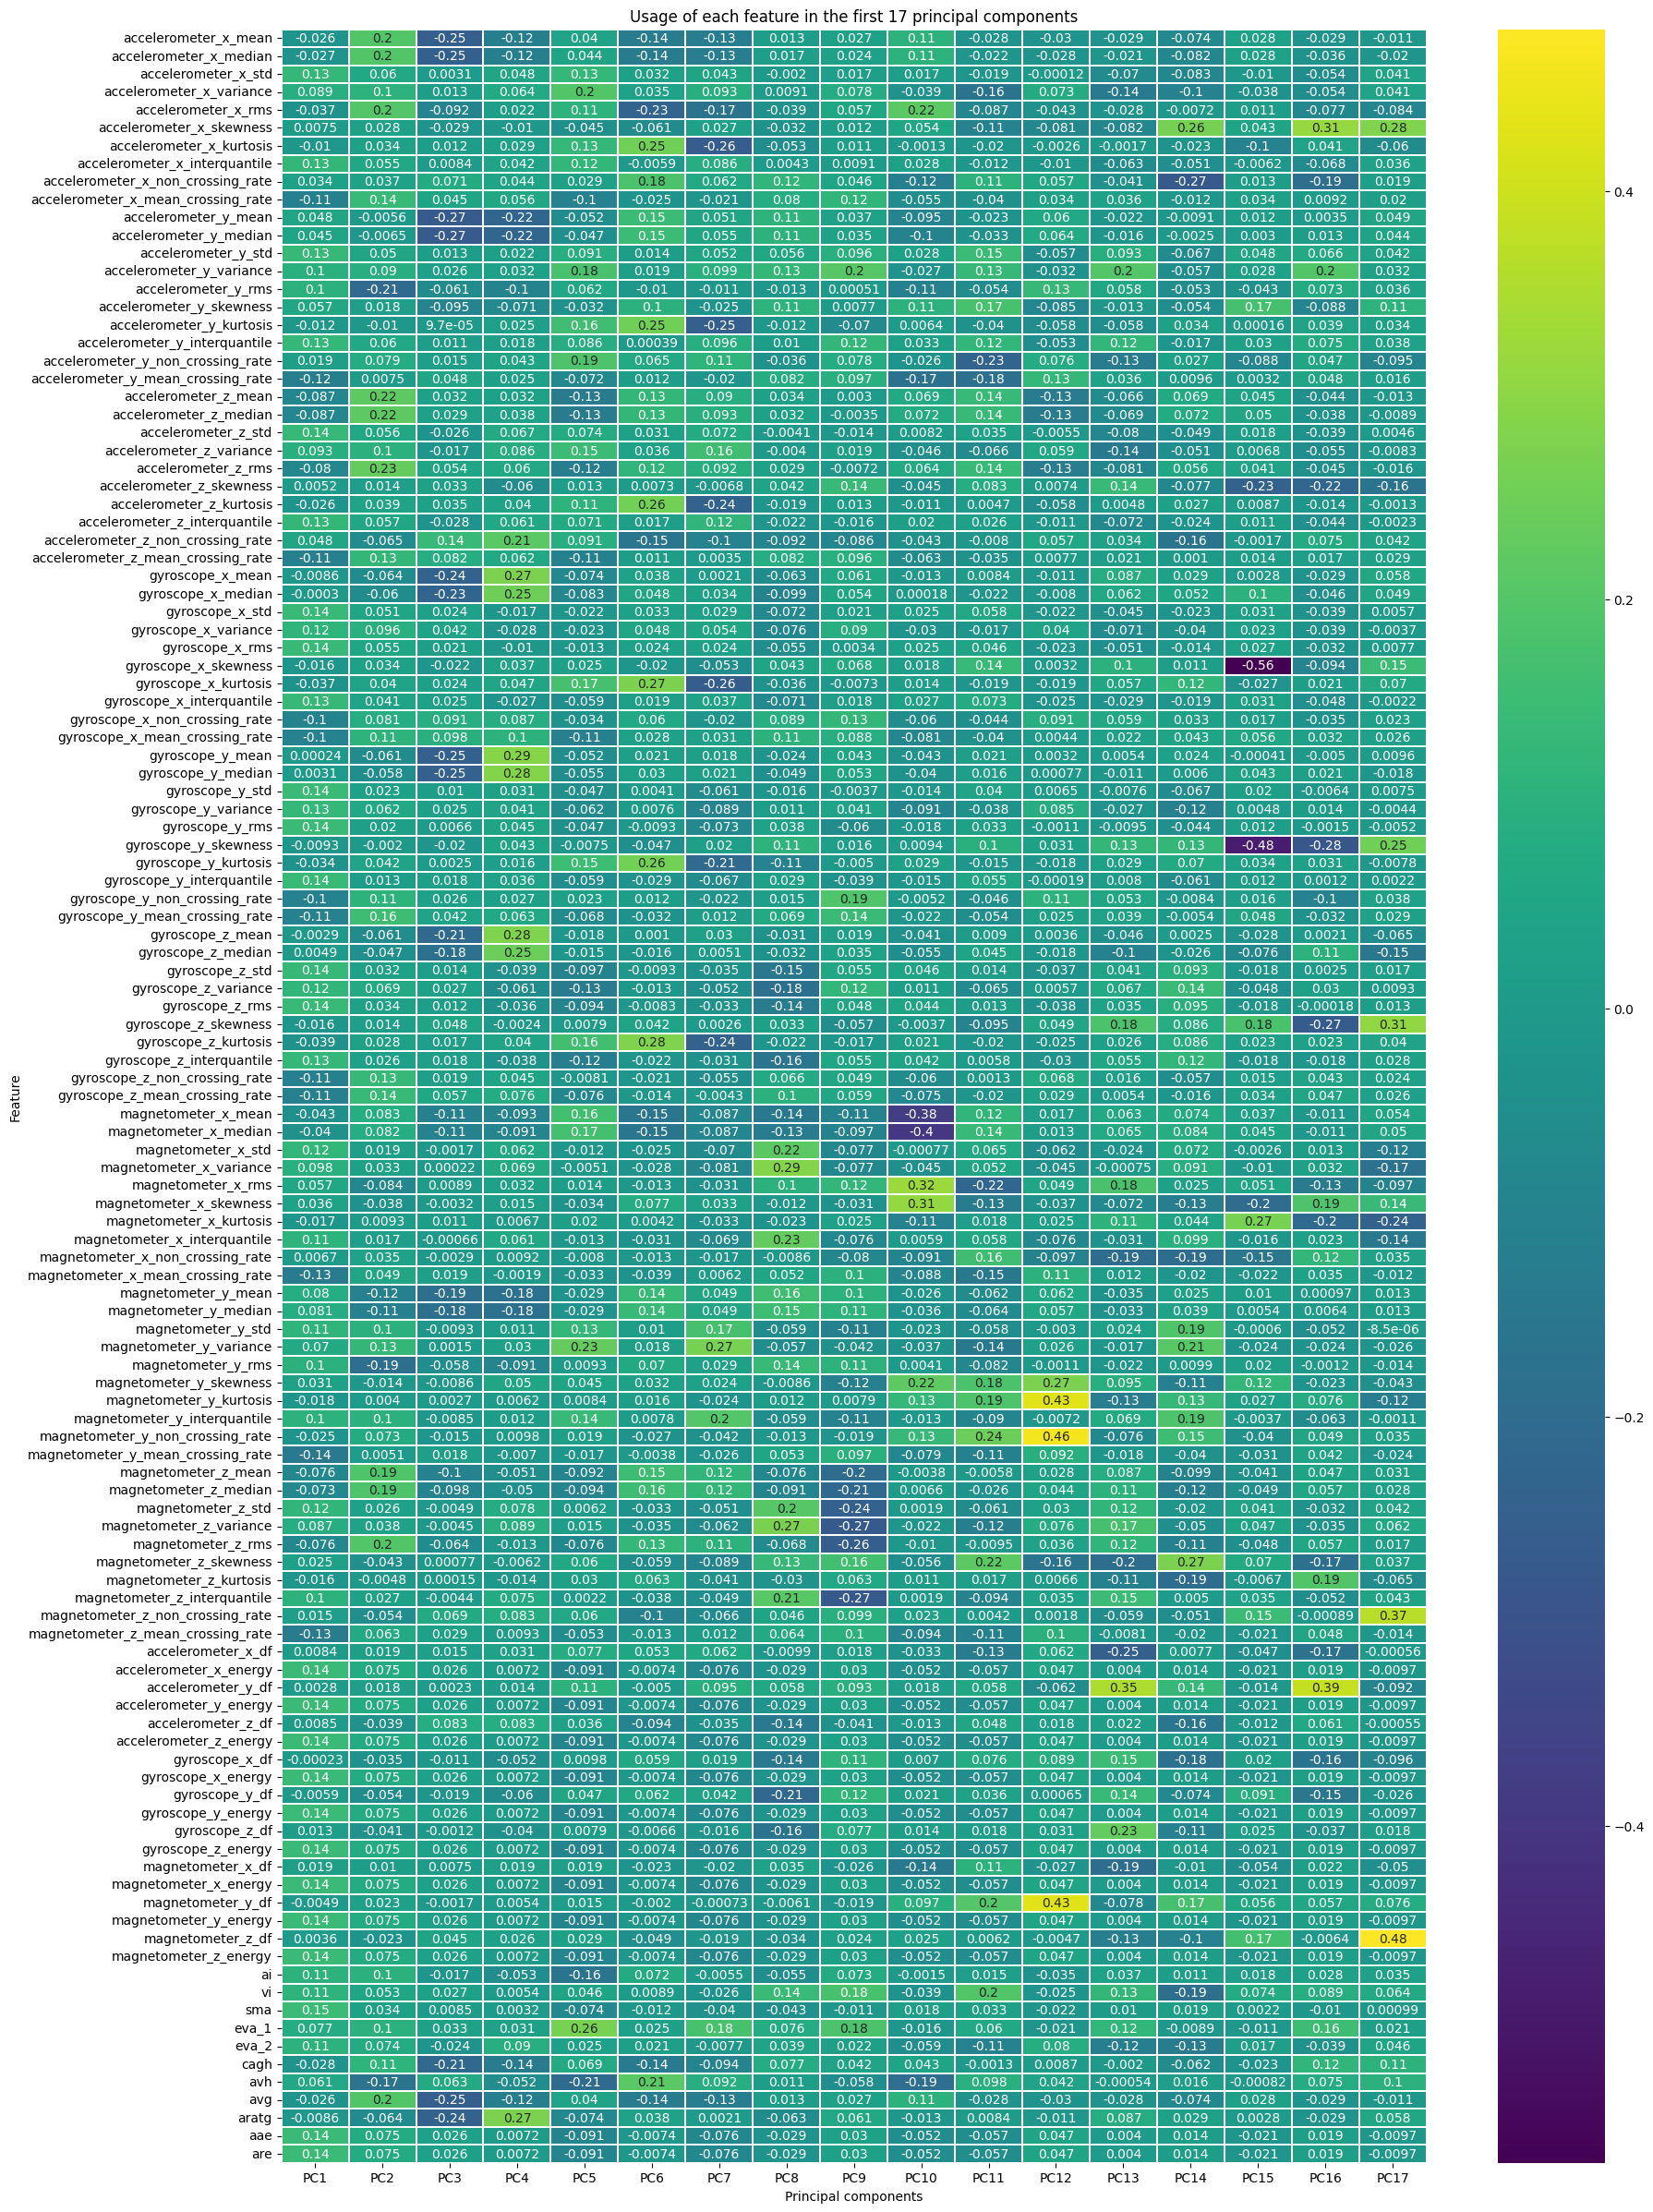

In [107]:
plt.figure(figsize=(20, 30))
sns.heatmap(pca_dataframe_relevant, cmap='viridis',linewidths=0.3, annot=True)
plt.xlabel('Principal components')
plt.ylabel('Feature')
plt.title('Usage of each feature in the first 17 principal components')
plt.show()